In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_context('talk')

plt.rcParams['font.family'] = "Ubuntu"
vcolor = '#582c83'

In [2]:
df = pd.read_csv("./Files/justVotes.csv")

In [4]:
df.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,FDP,FREIE WÄHLER,PIRATEN,Tierschutzpartei,...,DIE FRAUEN,Graue Panther,LKR,MENSCHLICHE WELT,NL,ÖkoLinX,Die Humanisten,PARTEI FÜR DIE TIERE,Gesundheitsforschung,Volt
0,69,84,77,21,44,0.0,25,3,2,9,...,2,0,0,0,0,0,0,1,1,5
1,24,37,39,5,19,0.0,7,3,4,0,...,0,0,0,0,0,1,0,0,0,2
2,145,145,153,26,61,0.0,34,5,4,11,...,1,7,0,0,0,0,2,4,1,7
3,114,115,133,28,66,0.0,20,10,10,5,...,0,1,1,0,0,0,4,2,1,1
4,93,105,156,45,53,0.0,21,6,8,8,...,0,4,1,0,0,0,0,1,0,4


In [7]:
redux = df.iloc[:,0:6]

In [8]:
redux['Volt'] = df['Volt']

In [9]:
redux.head()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,Volt
0,69,84,77,21,44,0.0,5
1,24,37,39,5,19,0.0,2
2,145,145,153,26,61,0.0,7
3,114,115,133,28,66,0.0,1
4,93,105,156,45,53,0.0,4


In [11]:
corr = redux.corr()

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

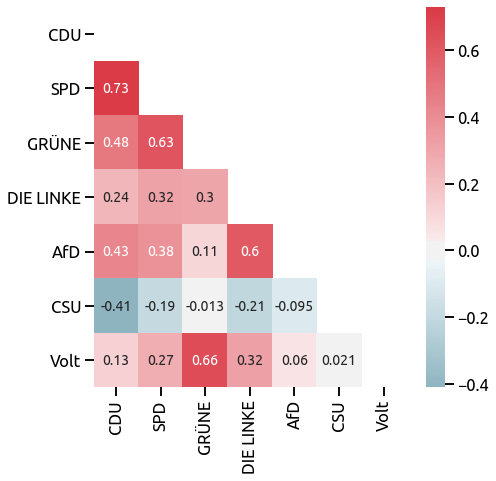

In [27]:
fig, ax = plt.subplots(figsize=(7,7))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, ax=ax, mask=mask, cmap=cmap, center=0.0, annot=True, annot_kws={'size': 14})
plt.show()

---

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
redux.describe()

,CDU,SPD,GRÜNE,DIE LINKE,AfD,CSU,Volt
count,86887.000000,86887.000000,86887.000000,86887.000000,86887.000000,86876.000000,86887.000000
mean,97.125865,68.098588,88.356958,23.663482,47.238977,27.108373,2.866919
std,94.929918,53.514993,74.947621,26.258234,36.734228,67.740633,4.009490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,32.000000,33.000000,8.000000,24.000000,0.000000,0.000000
50%,81.000000,58.000000,70.000000,16.000000,38.000000,0.000000,2.000000
75%,136.000000,91.000000,123.000000,29.000000,59.000000,0.000000,4.000000
max,2062.000000,1088.000000,1449.000000,460.000000,524.000000,900.000000,94.000000


In [41]:
redux.fillna(value=0.0, inplace=True)

In [42]:
X = redux.iloc[:,:-1]
y = redux['Volt']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
reglin = LinearRegression()  
reglin.fit(X_train, y_train)

LinearRegression()

In [45]:
#To retrieve the intercept:
print(reglin.intercept_)#For retrieving the slope:
print(reglin.coef_)

0.11351001085816215
[-0.00974181 -0.00905997  0.04266096  0.02325246  0.00168441 -0.00295929]


In [46]:
y_pred = reglin.predict(X_test)

In [49]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.7257219414244884
Mean Squared Error: 7.356394869503005
Root Mean Squared Error: 2.7122674774997773


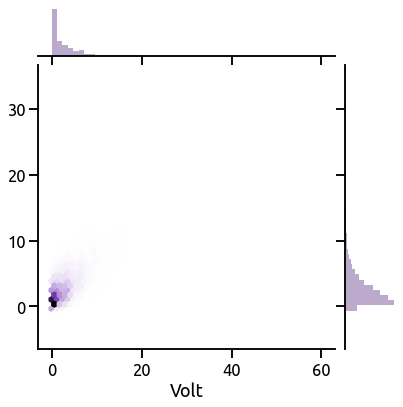

In [68]:
#fig, ax = plt.subplots(figsize=(6,6))

sns.jointplot(y_test, y_pred, kind='hex', color=vcolor)
#plt.plot([0,60], [0,60], c='r', lw=2)
plt.show()

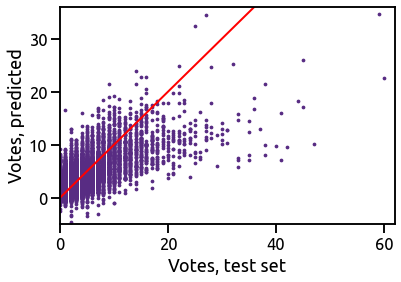

In [74]:
plt.scatter(y_test, y_pred, color=vcolor, s=5)
plt.plot([0,36], [0,36], c='r', lw=2)
plt.xlim(0, 62)
plt.ylim(-5, 36)
plt.xlabel("Votes, test set")
plt.ylabel("Votes, predicted")
plt.show()